<a href="https://colab.research.google.com/github/xyzaraa/hotel_analysis/blob/main/Code/hotel_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import re

# Data Wrangling

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Direktori Kiara
# df = pd.read_csv('/content/drive/MyDrive/Dataset/hotels.csv')

# Direktori Alviya
df = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/Dataset/hotels.csv')

In [4]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


## Data Cleaning

In [5]:
duplicates = df.duplicated().sum()
print(f"Banyak kolom duplikat sebelum cleaning: {duplicates}")

Banyak kolom duplikat sebelum cleaning: 31994


In [6]:
df_cleaned = df.drop_duplicates()

In [7]:
drop_duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows after cleaning: {drop_duplicates}")

Number of duplicate rows after cleaning: 0


In [8]:
null_data = df.isnull().sum()
print(f"Banyak missing value sebelum cleaning: {null_data}")

Banyak missing value sebelum cleaning: hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent             

In [9]:
numeric_columns = df_cleaned.select_dtypes(include='number').columns
categorical_columns = df_cleaned.select_dtypes(include='object').columns

In [10]:
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].mean())
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].fillna(df_cleaned[categorical_columns].mode().iloc[0])

In [11]:
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())


Missing values after cleaning:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                   

In [52]:
print("\nPreview of cleaned data:")
df_cleaned.head()


Preview of cleaned data:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,94.138306,183.081384,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,94.138306,183.081384,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,94.138306,183.081384,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.000000,183.081384,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.000000,183.081384,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


# Explanatory Data Analysis

In [13]:
df = df_cleaned

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.00000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.13864,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.45587,0.113597,0.193775,0.369145,1.731894,0.727245,104.995926,32.023528,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,183.081384,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,183.081384,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,183.081384,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.00000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [15]:
df[categorical_columns]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


## Pendapatan Pertahun dari Kedua Tipe Hotel

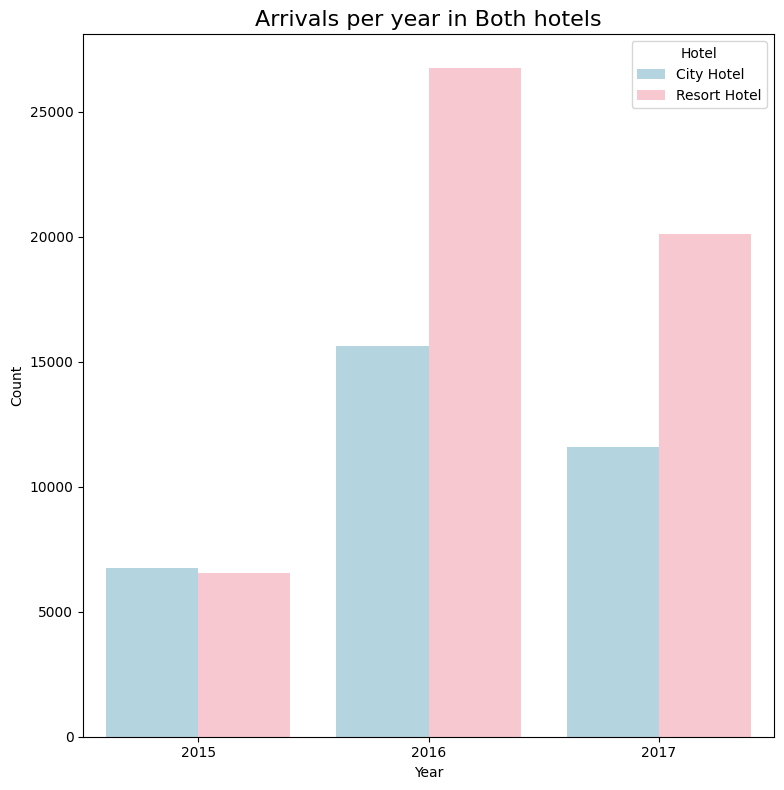

In [27]:
palette = ['#ADD8E6', '#FFC0CB']

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='arrival_date_year', hue='hotel', data=df, palette=palette)
plt.title("Arrivals per year in Both hotels", size=16)

plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Hotel", loc="upper right", labels=['City Hotel', 'Resort Hotel'])

plt.tight_layout()
plt.show()


## Average Daily Rate Perbulan dari Kedua Tipe Hotel

In [18]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [19]:
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

In [20]:
resort_hotel=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel['arrival_date_month'] = pd.Categorical(
    resort_hotel['arrival_date_month'], categories=months_order, ordered=True)

resort_hotel = resort_hotel.sort_values('arrival_date_month').reset_index(drop=True)

resort_hotel

,arrival_date_month,adr
0,January,48.542066
1,February,53.624311
2,March,57.083964
3,April,76.841664
4,May,77.725129
5,June,108.970363
6,July,150.914540
7,August,182.103524
8,September,98.855456
9,October,62.578195


In [21]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel['arrival_date_month'] = pd.Categorical(
    city_hotel['arrival_date_month'], categories=months_order, ordered=True)

city_hotel = city_hotel.sort_values('arrival_date_month').reset_index(drop=True)

city_hotel

,arrival_date_month,adr
0,January,83.180097
1,February,87.843338
2,March,90.759820
3,April,114.121066
4,May,124.533785
5,June,120.486062
6,July,119.740148
7,August,122.497179
8,September,116.723183
9,October,105.140685


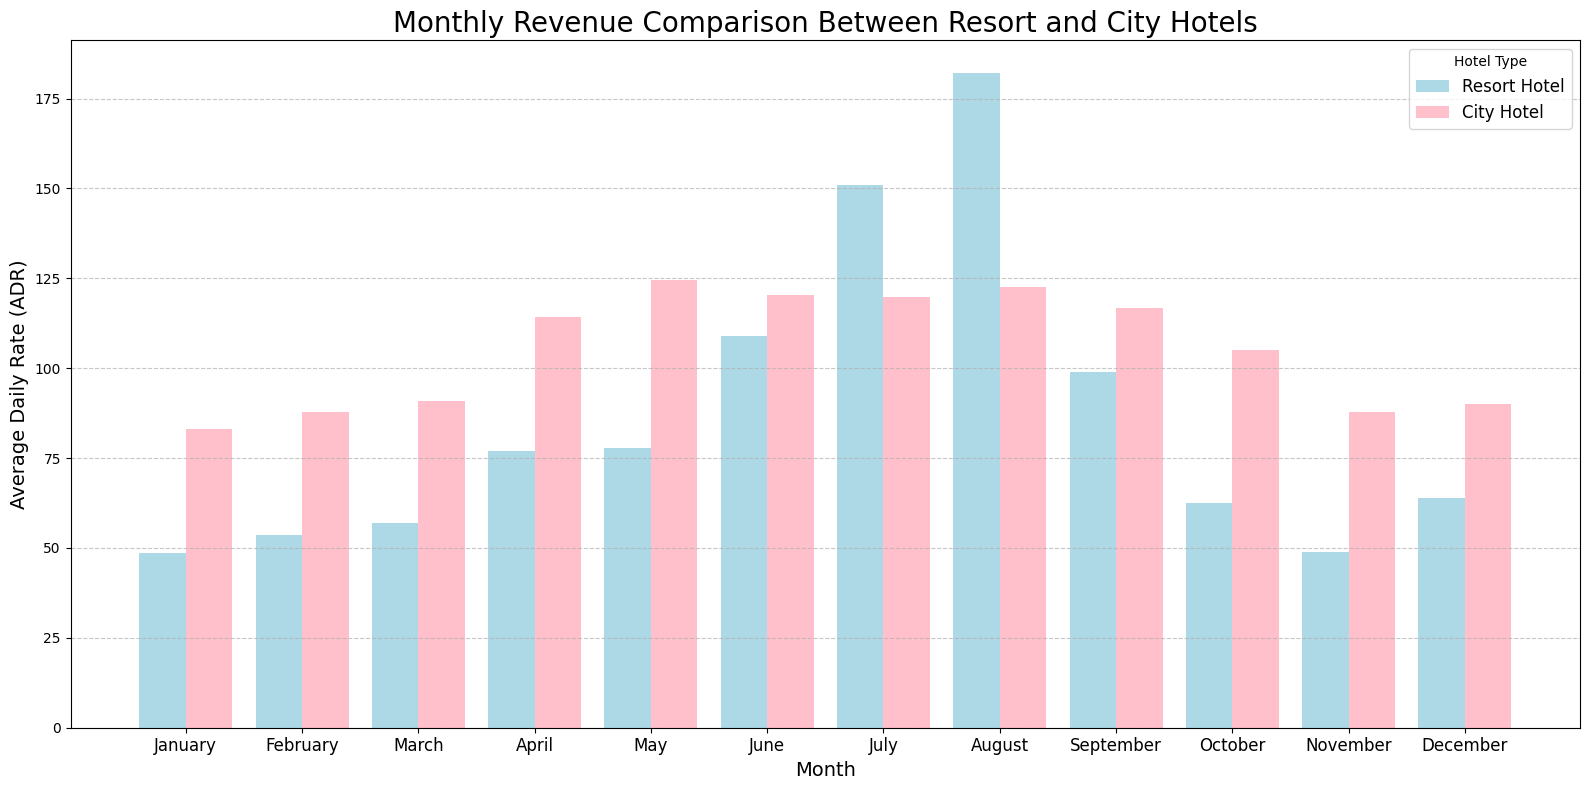

In [45]:
width=0.4
x = np.arange(len(months_order))

plt.figure(figsize=(16, 8))
plt.bar(x - width/2, resort_hotel['adr'], color='#ADD8E6', width=width, label='Resort Hotel')
plt.bar(x + width/2, city_hotel['adr'], color='#FFC0CB', width=width, label='City Hotel')
plt.title('Monthly Revenue Comparison Between Resort and City Hotels', size=20, color='black')
plt.xlabel('Month', size=14)
plt.ylabel('Average Daily Rate (ADR)', size=14)
plt.xticks(ticks=x, labels=months_order, fontsize=12)
plt.legend(title='Hotel Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Status Reservasi

In [ ]:
canceled_reservation = df['is_canceled'].value_counts()
canceled_reservation

,count
is_canceled,
0,63371
1,24025


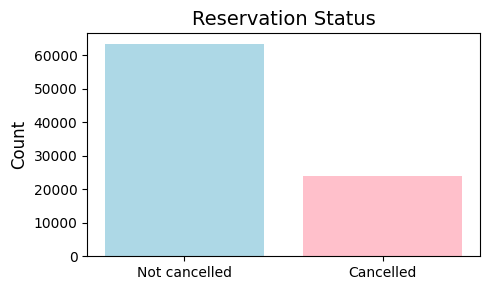

In [ ]:
palette = ['#ADD8E6', '#FFC0CB']

plt.figure(figsize=(5, 3))
plt.title('Reservation Status', fontsize=14, color='black')
plt.bar(['Not cancelled', 'Cancelled'], df['is_canceled'].value_counts(), color=palette)
plt.ylabel('Count', fontsize=12, color='black')
plt.tight_layout()
plt.show()

## Reservation Status Tiap Tipe Hotel

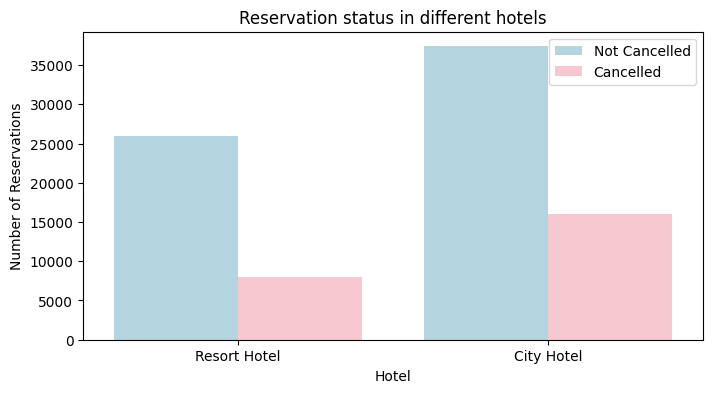

In [ ]:
plt.figure(figsize=(8, 4))

ax1 = sns.countplot(
    x='hotel',
    hue='is_canceled',
    data=df,
    palette={0: '#ADD8E6', 1: '#FFC0CB'}
    )

legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

plt.title('Reservation status in different hotels')
plt.xlabel('Hotel',color='Black')
plt.ylabel('Number of Reservations', color='Black')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()

## Banyaknya Pembatalan Reservasi Perbulan

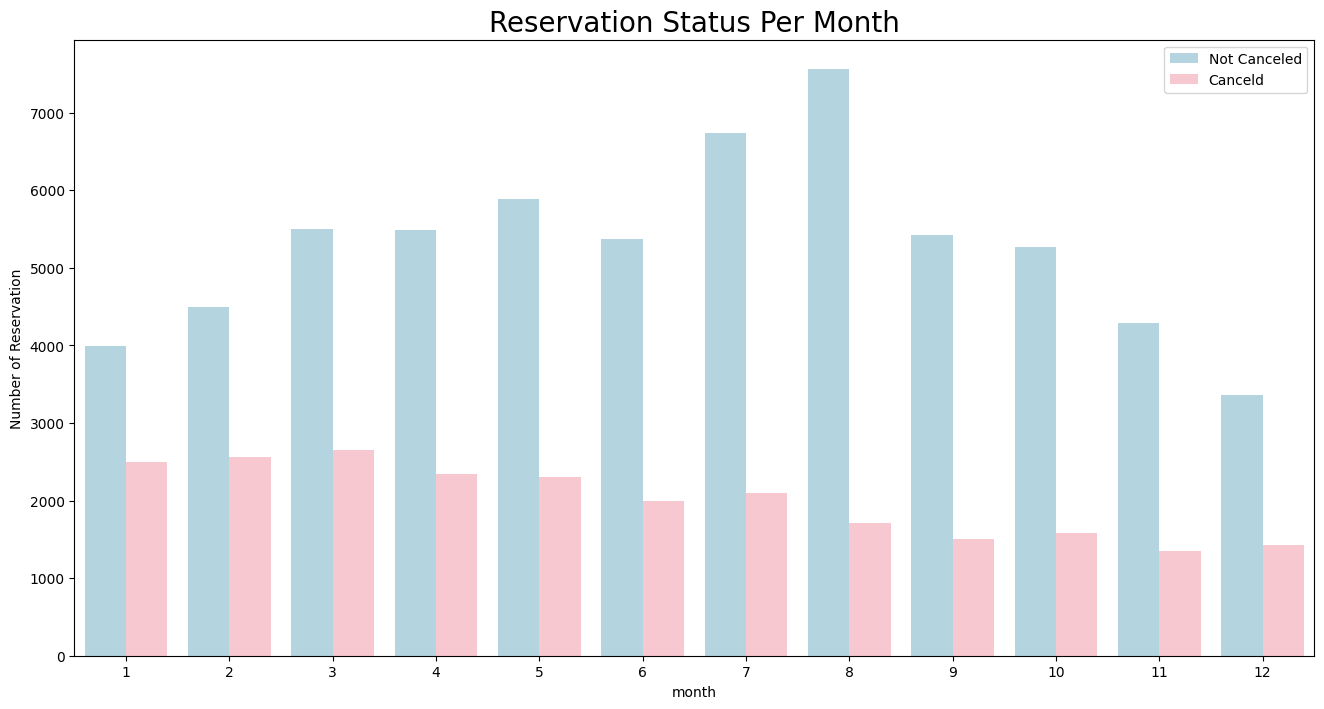

In [48]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1 = sns.countplot(x='month', hue='is_canceled', data= df, palette = palette)
legend_lebels,_ = ax1.get_legend_handles_labels()
plt.title('Reservation Status Per Month', size = 20)
plt.xlabel('month')
plt.ylabel('Number of Reservation')
plt.legend(['Not Canceled','Canceld'])
plt.show()

## Jumlah Customer Reservasi Ulang

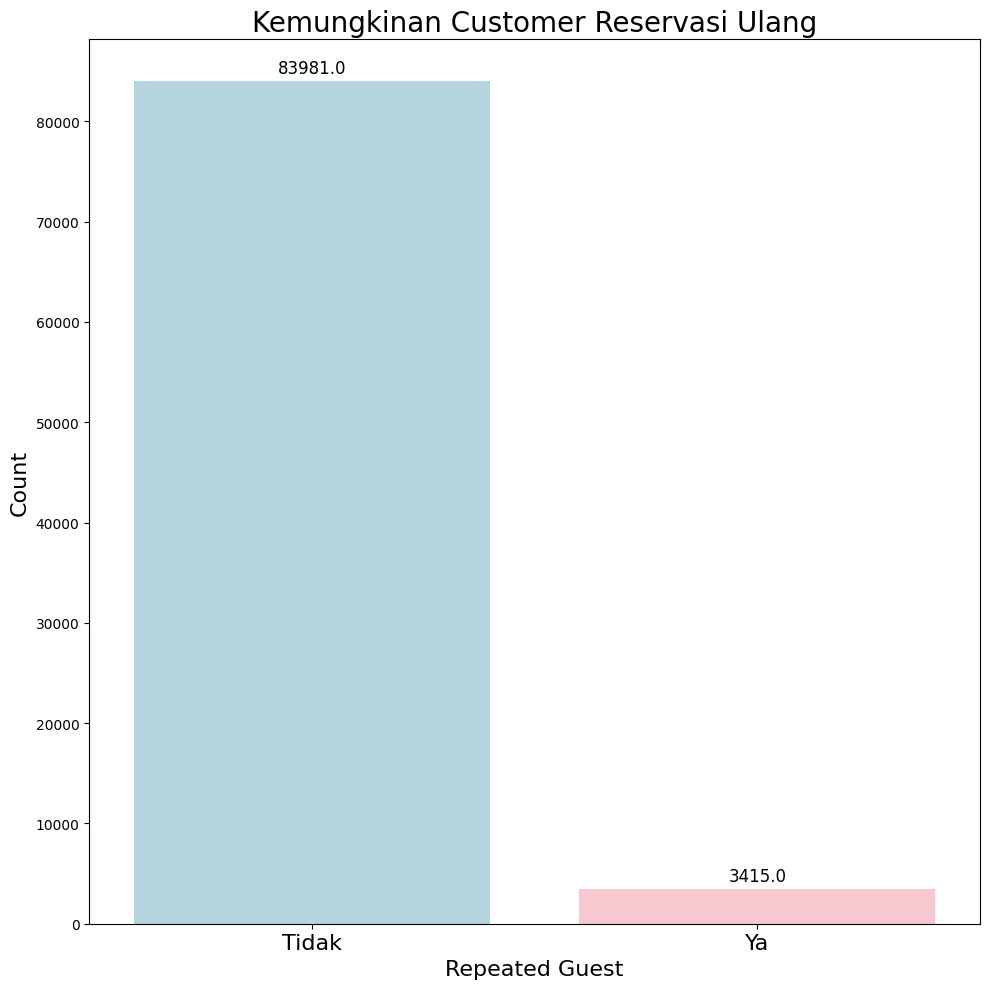

In [57]:
plt.figure(figsize=(10, 10))

# Buat plot countplot
ax = sns.countplot(data=df, x='is_repeated_guest', palette=palette)

# Set judul dan label
ax.set_title('Kemungkinan Customer Reservasi Ulang', fontsize=20, color='black')
ax.set_xticklabels(['Tidak', 'Ya'], fontsize=16)
plt.xlabel('Repeated Guest', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.yticks(fontsize=10)

# Tambahkan label di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

# Atur layout untuk agar lebih rapat
plt.tight_layout()

# Menampilkan grafik
plt.show()

##  Pembatalan Reservasi Berdasarkan Tipe Customer

In [58]:
repeated_guest_cancellation = df.groupby('is_repeated_guest')['is_canceled'].mean()

fig = px.pie(
    names=repeated_guest_cancellation.index.map({0: 'Non-Repeated Guest', 1: 'Repeated Guest'}),
    values=repeated_guest_cancellation.values * 100,
    title='Cancellation Rate by Guest Type',
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig.update_traces(textinfo='percent+label')
fig.show()

## Negara Asal Customer

In [ ]:
guest = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
guest.columns = ['country', 'Number of guests']
guest

,country,Number of guests
0,PRT,18080
1,GBR,8448
2,FRA,7104
3,ESP,5390
4,DEU,4334
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [ ]:
max_country = guest['country'][0]
explode_values = [0.1 if country == max_country else 0 for country in guest['country']]

fig = px.pie(guest,
             values="Number of guests",
             names="country",
             title="Home Country of Guests",
             template="seaborn")

fig.update_traces(pull=explode_values, textposition="inside", textinfo="value+percent+label")
fig.show()

## Negara dengan Jumlah Pembatalan Tertinggi

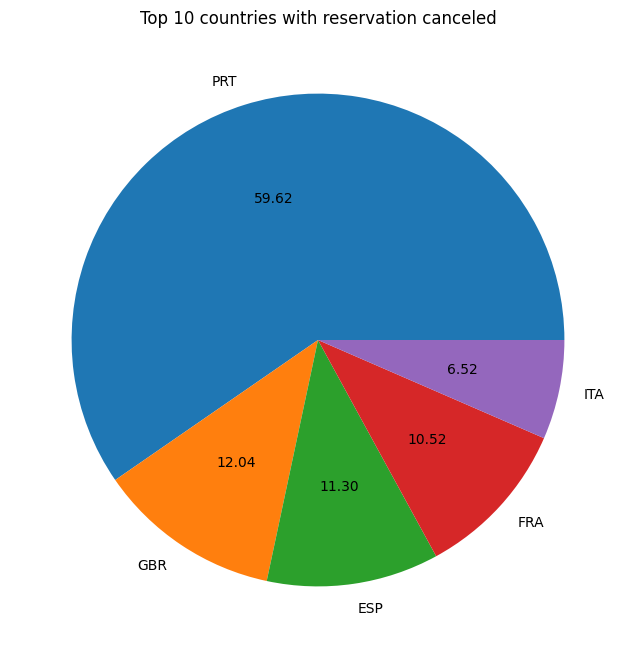

In [51]:
cancelled_data= df[df['is_canceled']==1]
top_5_calcellation = cancelled_data['country'].value_counts()[:5]
plt.figure(figsize=(8,8))
plt.title('Top 10 countries with reservation canceled',color="black")
plt.pie(top_5_calcellation, autopct ='%.2f', labels = top_5_calcellation.index)
plt.show()

## Pendapatan pada Weekend dan Weekdays Masing-masing Tipe Hotel

In [ ]:
#Bagaimana rata2 pendapatan perhari untuk masing-masing hotel?
#disini kita akan membagi menjadi subplot untuk masing-masing hotel
#selain itu juga diberikan opsi untuk pilihan weekend atau weekdays

avg_revenue_weekend = df.groupby(['hotel', 'stays_in_weekend_nights'])['adr'].mean().reset_index()
avg_revenue_weekday = df.groupby(['hotel', 'stays_in_week_nights'])['adr'].mean().reset_index()

fig = go.Figure()
for hotel in avg_revenue_weekend['hotel'].unique():
  fig.add_trace(go.Bar(
      x=[hotel],
      y=avg_revenue_weekend[avg_revenue_weekend['hotel']==hotel]['adr'],
      name='Weekend Average Income',
      visible=True,
      ))

for hotel in avg_revenue_weekday['hotel'].unique():
  fig.add_trace(go.Bar(
      x=[hotel],
      y=avg_revenue_weekday[avg_revenue_weekday['hotel']==hotel]['adr'],
      name='Weekday Average Income',
      visible=True
      ))

In [ ]:
fig.update_layout(
    updatemenus=[
       dict(
            buttons=list([
                dict(label="Weekend",
                     method="update",
                     args=[{"visible": [True, True, False, False]},
                           {"title": "Average Revenue per Day - Weekend"}]),
                dict(label="Weekday",
                     method="update",
                     args=[{"visible": [False, False, True, True]},
                           {"title": "Average Revenue per Day - Weekday"}]),
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Average Revenue per Day - Both"}])
            ]),
            direction="down",
            showactive=True,
        )
    ], title='Avg Revenue per Day for Each Hotel',
    xaxis_title = 'Hotel',
    yaxis_title = 'Average Revenue',
    barmode='group',
    template='ggplot2'
)

fig.show()

## Distribusi Tipe Customer

In [ ]:
customer_type_counts = df['customer_type'].value_counts()

fig = px.pie(
    customer_type_counts,
    values=customer_type_counts.values,
    names=customer_type_counts.index,
    title='Distribution of Customer Types',
    color=customer_type_counts.index,  # Set color based on customer type
    color_discrete_map={
        'Transient': 'skyblue',
        'Contract': 'lightcoral',
        'Transient-Party': 'lightgreen',
        'Group': 'gold'
    }
)

fig.show()

## Analyze Data

Before we get into the main topic, let's see the correlation between each variable using heatmap

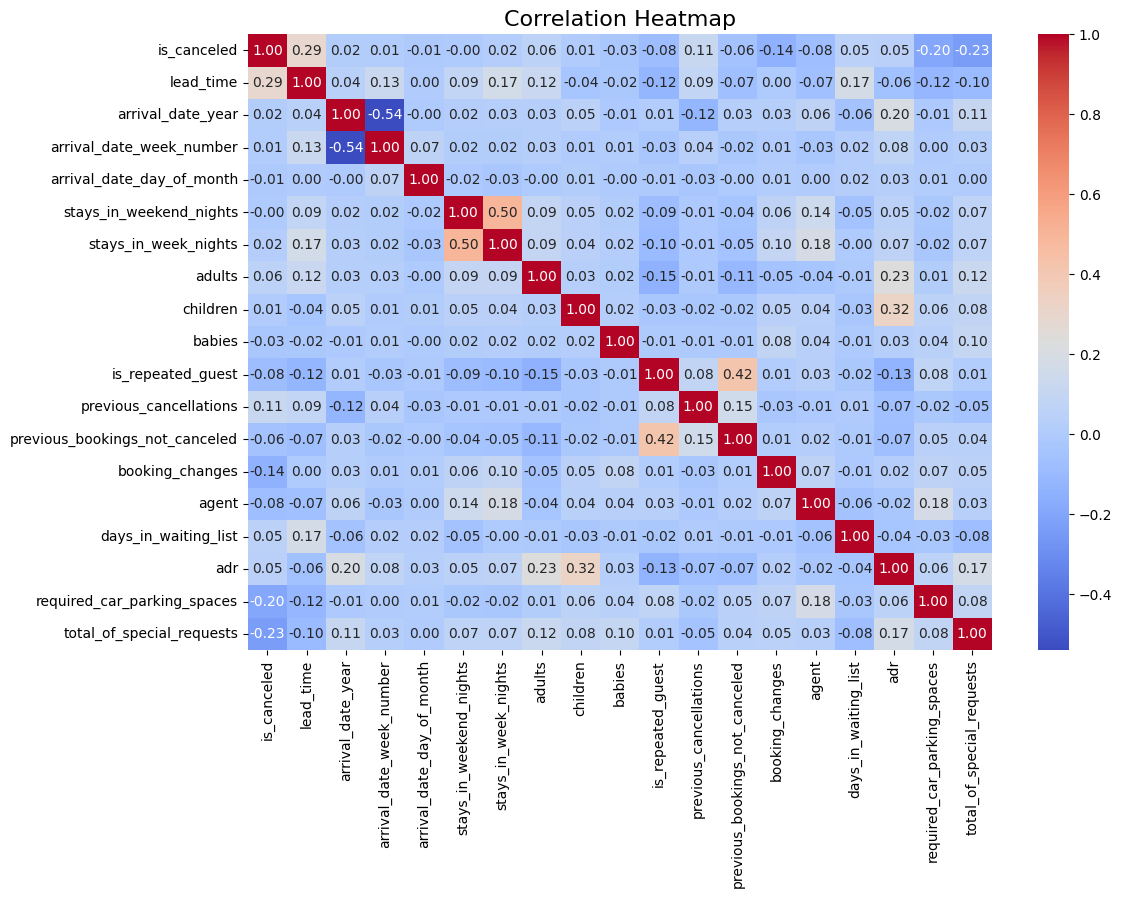

In [ ]:
df_corr = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
fig = px.line(cancellation_by_year.reset_index(),
              x='arrival_date_year',
              y='cancellation_percentage',
              title='Cancellation Percentage by Year',
              markers=True)
fig.update_xaxes(type='category')
fig.show()

### Is there a relationship between days in waiting list and likelihood of cancellation?


In [ ]:
df['is_canceled_label'] = df['is_canceled'].replace({0: 'Not Cancelled', 1: 'Cancelled'})

fig = px.violin(df, x='is_canceled_label', y='days_in_waiting_list', box=True, points='all', color='is_canceled_label')
fig.update_layout(
    xaxis_title='Cancellation Status',
    yaxis_title='Days in Waiting List',
)
fig.show()

### What is the average revenue per day for each hotel?

In [ ]:
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR


grouped_data = df[df['adr'] <= upper_bound].groupby(['children', 'hotel'])['adr'].mean().reset_index()


fig_adr_children = px.bar(
    grouped_data,
    x='children',
    y='adr',
    color='hotel',
    barmode='group',
    title='ADR Distribution by Number of Children',
    labels={'children': 'Children',
            'adr': 'Average Daily Rate (ADR)',
            'hotel': 'Hotel Type'}
)

fig_adr_children.update_layout(
    height=700,
    width=1000,
    title_x=0.5,
    showlegend=True,
    legend_title="Hotel Type",
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99
    ),
    yaxis=dict(
        title=dict(
            text='Average Daily Rate (ADR)',
            font=dict(size=14)
        )
    ),
    xaxis=dict(
        title=dict(
            text='Jumlah Anak',
            font=dict(size=14)
        ),
        tickmode='linear',
        dtick=1
    ),
    plot_bgcolor='white',
    xaxis_gridcolor='lightgrey',
    yaxis_gridcolor='lightgrey'
)


fig_adr_children.show()

# Data Cleaning

In [ ]:
df.drop(columns=['company', 'meal'], inplace=True)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')